In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
bowling_stats = pd.read_csv('Player Bowling Stats - Most Wickets.csv')

In [3]:
# Clean data
bowling_stats['Matches'] = pd.to_numeric(bowling_stats['Matches'], errors='coerce')
bowling_stats['Overs'] = pd.to_numeric(bowling_stats['Overs'], errors='coerce')
bowling_stats['Strike Rate'] = pd.to_numeric(bowling_stats['Strike Rate'], errors='coerce')
bowling_stats['Wickets'] = pd.to_numeric(bowling_stats['Wickets'], errors='coerce')


In [4]:
bowling_stats.dropna(inplace=True)

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
# Prepare the data
X = bowling_stats[['Matches', 'Overs', 'Strike Rate']].values
y = bowling_stats['Wickets'].values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 184.7703 - mean_absolute_error: 13.4625 - val_loss: 169.4483 - val_mean_absolute_error: 12.9175
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 183.9010 - mean_absolute_error: 13.4284 - val_loss: 168.7138 - val_mean_absolute_error: 12.8908
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 183.0521 - mean_absolute_error: 13.3951 - val_loss: 167.9870 - val_mean_absolute_error: 12.8644
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 182.1950 - mean_absolute_error: 13.3615 - val_loss: 167.2863 - val_mean_absolute_error: 12.8388
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 181.3667 - mean_absolute_error: 13.3288 - val_loss: 166.6150 - val_mean_absolute_error: 12.8142
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 180.5486 - mean_absolute_error: 13.2963 - val_loss: 166.0025 - val_mean_absolute_error: 12.7915
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 179.7603 - mean_absol

In [7]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [8]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison)

   Actual  Predicted
0      13   1.551424
1      11   2.223374
2      17   2.270321


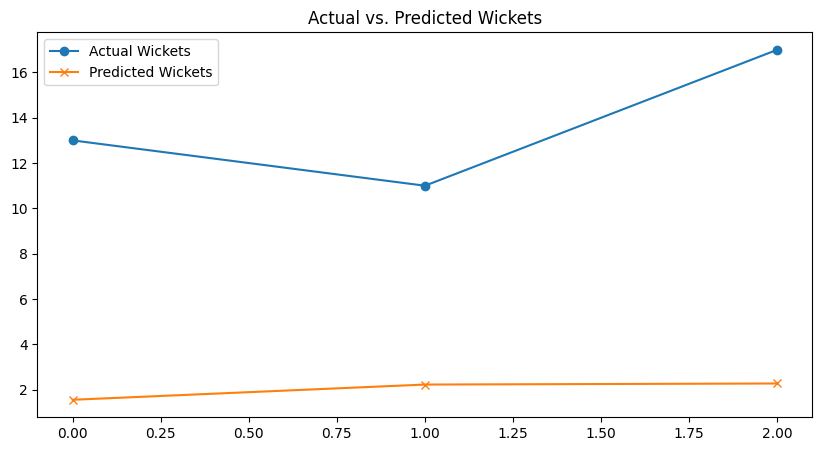

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Wickets', marker='o')
plt.plot(y_pred, label='Predicted Wickets', marker='x')
plt.legend()
plt.title('Actual vs. Predicted Wickets')
plt.show()